In [ ]:
import numpy as np
import numpy.linalg as la
import os
from ctypes import c_int, c_double, POINTER, cdll
from tqdm import tqdm

import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science', 'grid'])
plt.rcParams.update({'font.size': 20})
plt.rcParams.update({'figure.figsize': (8, 6)})

In [22]:
a = 0.3
plt_x = np.linspace(0, 1, 1000)

# MLAE
deg_MLAE = [1<<i|1 for i in range(5)]
rep_MLAE = 32
res_MLAE = [np.random.binomial(rep_MLAE, np.sin(deg * np.arcsin(np.sqrt(a)))**2) for deg in deg_MLAE]
logL_MLAE = sum([res_MLAE[i] * np.log(np.sin(deg_MLAE[i] * np.arcsin(np.sqrt(plt_x)))**2)
                 + (rep_MLAE - res_MLAE[i]) * np.log(np.cos(deg_MLAE[i] * np.arcsin(np.sqrt(plt_x)))**2) for i in range(len(deg_MLAE))])

# RQAE
cdf_RQAE = np.cumsum(1 / np.arange(1, 33))
length_RQAE = round(32 * cdf_RQAE[-1])
cdf_RQAE /= cdf_RQAE[-1]  # normalize to 1
deg_RQAE = np.array([np.searchsorted(cdf_RQAE, np.random.random()) + 1 for _ in range(length_RQAE)], dtype=np.int32)
res_RQAE = np.random.binomial(1, np.sin(deg_RQAE * np.arcsin(np.sqrt(a)))**2)
logL_RQAE = sum([res_RQAE[i] * np.log(np.sin(deg_RQAE[i] * np.arcsin(np.sqrt(plt_x)))**2)
                 + (1 - res_RQAE[i]) * np.log(np.cos(deg_RQAE[i] * np.arcsin(np.sqrt(plt_x)))**2) for i in range(len(res_RQAE))])

C:\Users\hello\AppData\Local\Temp\ipykernel_25776\2832204934.py:8: RuntimeWarning: divide by zero encountered in log
  logL_MLAE = sum([res_MLAE[i] * np.log(np.sin(deg_MLAE[i] * np.arcsin(np.sqrt(plt_x)))**2)
C:\Users\hello\AppData\Local\Temp\ipykernel_25776\2832204934.py:8: RuntimeWarning: invalid value encountered in multiply
  logL_MLAE = sum([res_MLAE[i] * np.log(np.sin(deg_MLAE[i] * np.arcsin(np.sqrt(plt_x)))**2)
C:\Users\hello\AppData\Local\Temp\ipykernel_25776\2832204934.py:17: RuntimeWarning: divide by zero encountered in log
  logL_RQAE = sum([res_RQAE[i] * np.log(np.sin(deg_RQAE[i] * np.arcsin(np.sqrt(plt_x)))**2)
C:\Users\hello\AppData\Local\Temp\ipykernel_25776\2832204934.py:17: RuntimeWarning: invalid value encountered in multiply
  logL_RQAE = sum([res_RQAE[i] * np.log(np.sin(deg_RQAE[i] * np.arcsin(np.sqrt(plt_x)))**2)


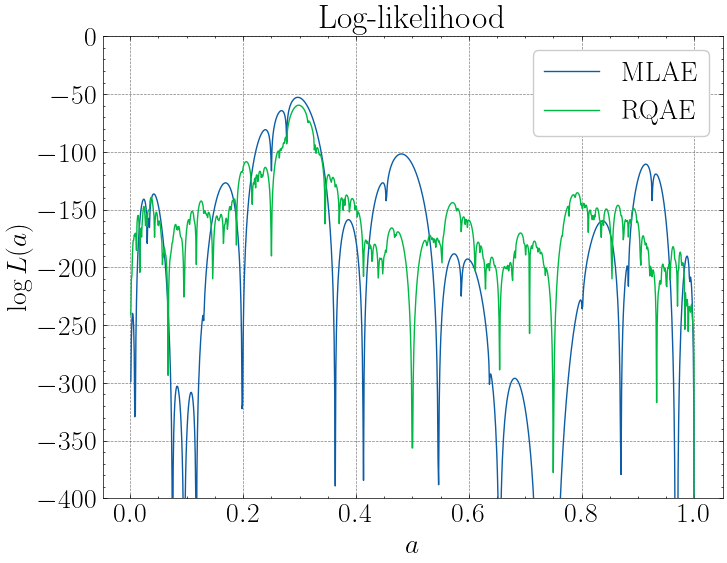

In [23]:
plt.plot(plt_x, logL_MLAE, label='MLAE', color='C0')
plt.plot(plt_x, logL_RQAE, label='RQAE', color='C1')
plt.xlabel(r'$a$')
plt.ylabel(r'$\log L(a)$')
plt.ylim(-400, 0)
plt.legend()
plt.title('Log-likelihood')
plt.savefig('logL.pdf')
plt.show()